<a href="https://colab.research.google.com/github/iqbal-svg/ai-ml-project/blob/main/integrated_retail_analytics1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Integrated reatail analytics for store optimization



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
By Iqbal Shaikh

# **Project Summary -

**To Utilize ML model and data analytics technique to optimise store procedure and forcast demand and enhance customer experience through segmentation and personalised marketing strtegies

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

Problem Statement:
In the highly competitive retail sector, inefficient store operations, inaccurate demand forecasting, and generic marketing strategies often lead to inventory mismanagement, reduced customer satisfaction, and missed revenue opportunities. Traditional methods fail to leverage the vast amount of data available from sales, customer behavior, and inventory systems.

This project aims to address these challenges by utilizing machine learning models and data analytics techniques to optimize store operations, forecast product demand accurately, and enhance customer experience through effective customer segmentation and personalized marketing strategies.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [4]:
# Load Dataset
df_stores=pd.read_csv("/content/stores data-set.csv")
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
df_sales=pd.read_csv("/content/sales data-set.csv")
df_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [6]:
df_features=pd.read_csv("/content/Features data set.csv")
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [7]:
df_features.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

### Dataset First View

In [8]:
# Dataset First Look
#Merge sales with features on ['Store', 'Date']
merged_df = pd.merge(df_sales, df_features, on=['Store','Date'],how='left')
merged_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [9]:
# Merge with store details on 'Store'
final_df = pd.merge(merged_df, df_stores, on='Store', how='left')
final_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


### Dataset Rows & Columns count

In [10]:
# Dataset Rows & Columns count
final_df.shape

(421570, 17)

### Dataset Information

In [11]:
# Dataset Info
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  IsHoliday_y   421570 non-null  bool   
 15  Type          421570 non-null  object 
 16  Size          421570 non-null  int64  
dtypes: bool(2), float64(10), int64(3), object(2)
mem

#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count
final_df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
final_df.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday_x,0
Temperature,0
Fuel_Price,0
MarkDown1,270889
MarkDown2,310322
MarkDown3,284479


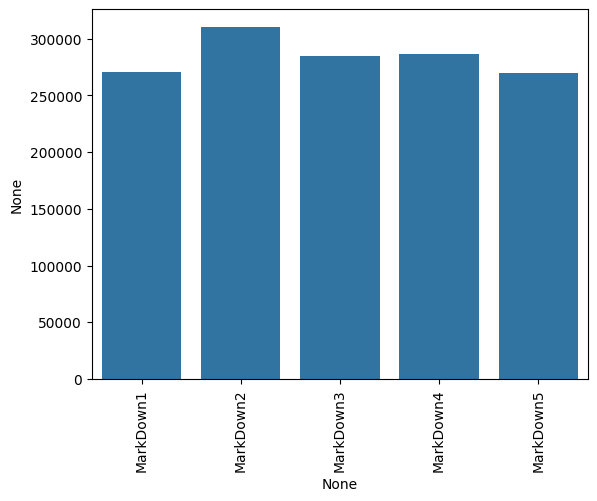

In [14]:
# Visualizing the missing values
missing_value=final_df.isnull().sum()
missing_value=missing_value[missing_value>0]
sns.barplot(x=missing_value.index,y=missing_value)
plt.xticks(rotation=90)
plt.show()

### What did you know about your dataset?

Answer Here:from this chart we came to know that markdown has only null values

## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
final_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type', 'Size'],
      dtype='object')

In [16]:
# Dataset Describe
final_df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


### Variables Description

Answer Here
Temperature	Average temperature in the region (in Fahrenheit).

Fuel_Price	Cost of fuel in the region (e.g., per gallon).

CPI	Consumer Price Index (economic indicator showing inflation levels).

Unemployment	Unemployment rate in the region (percentage).

Weekly_Sales	Total sales for that department/store for the given week.

MarkDown1–5	Promotional markdowns applied that week (each one likely represents a different category or strategy). NaN values mean no promotion was applied.

Date	Week-ending date for the data entry (usually in YYYY-MM-DD format).

IsHoliday_x	Boolean (True/False): whether the date is a holiday (from one source).

IsHoliday_y	Same as IsHoliday_x, possibly from a different merge or source.

Store	Store ID (a unique identifier for each store).

Dept	Department number (identifies different departments within a store).

Type	Store type (e.g., 'A', 'B', or 'C' based on size and performance).

Size	Physical size of the store (in square feet).

### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
for i in final_df.columns:
  print(f'Number of unique values in {i} is {final_df[i].nunique()}')

Number of unique values in Store is 45
Number of unique values in Dept is 81
Number of unique values in Date is 143
Number of unique values in Weekly_Sales is 359464
Number of unique values in IsHoliday_x is 2
Number of unique values in Temperature is 3528
Number of unique values in Fuel_Price is 892
Number of unique values in MarkDown1 is 2277
Number of unique values in MarkDown2 is 1499
Number of unique values in MarkDown3 is 1662
Number of unique values in MarkDown4 is 1944
Number of unique values in MarkDown5 is 2293
Number of unique values in CPI is 2145
Number of unique values in Unemployment is 349
Number of unique values in IsHoliday_y is 2
Number of unique values in Type is 3
Number of unique values in Size is 40


## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Write your code to make your dataset analysis ready.
# Convert the 'Date' column to datetime format
final_df['Date'] = pd.to_datetime(final_df['Date'],dayfirst=True)


In [19]:
#fill columns
#final_df.isnull().sum()
final_df.fillna(0,inplace=True)

In [20]:
final_df.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday_x,0
Temperature,0
Fuel_Price,0
MarkDown1,0
MarkDown2,0
MarkDown3,0


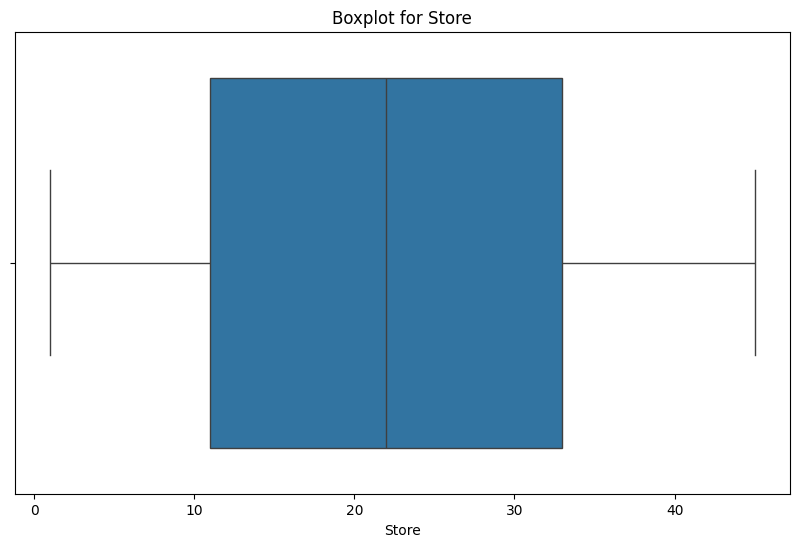

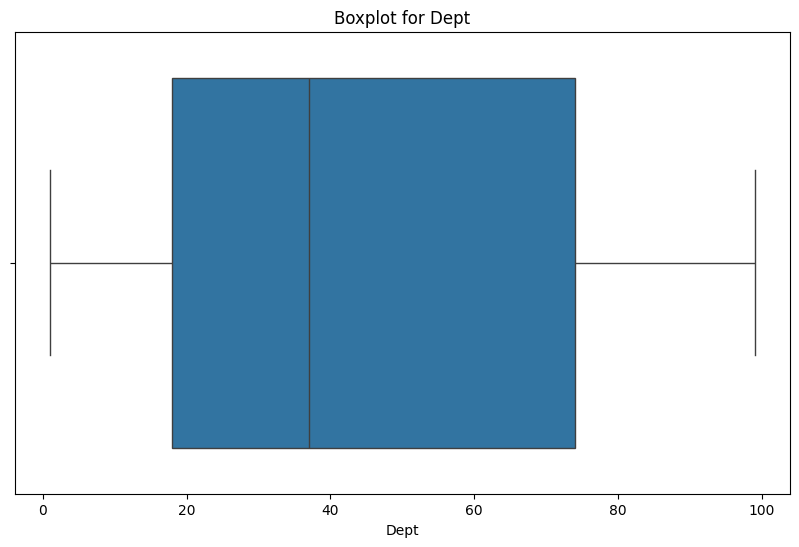

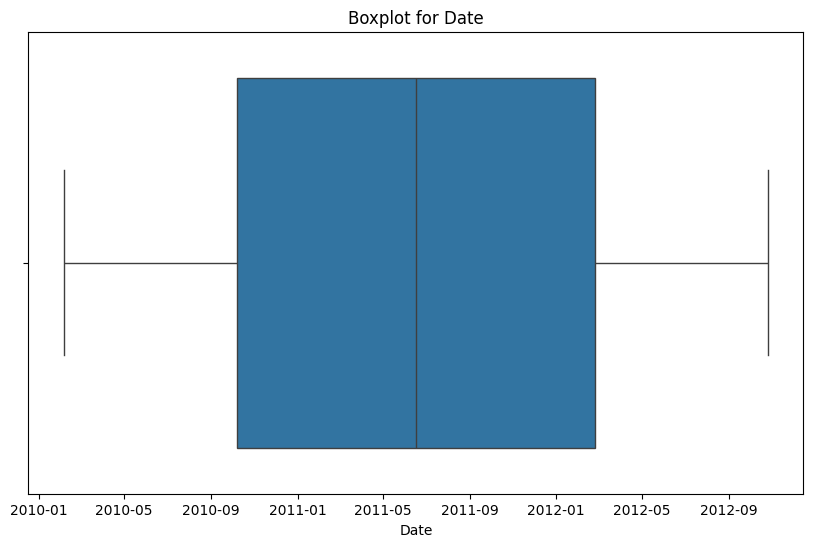

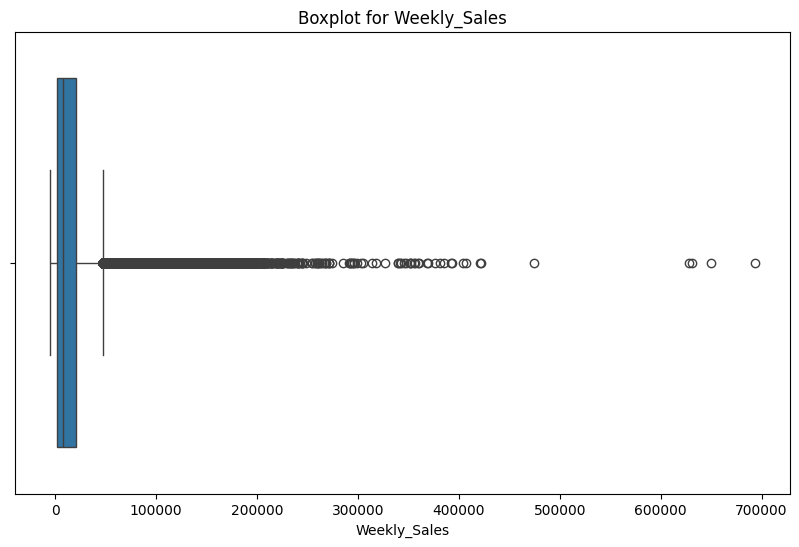

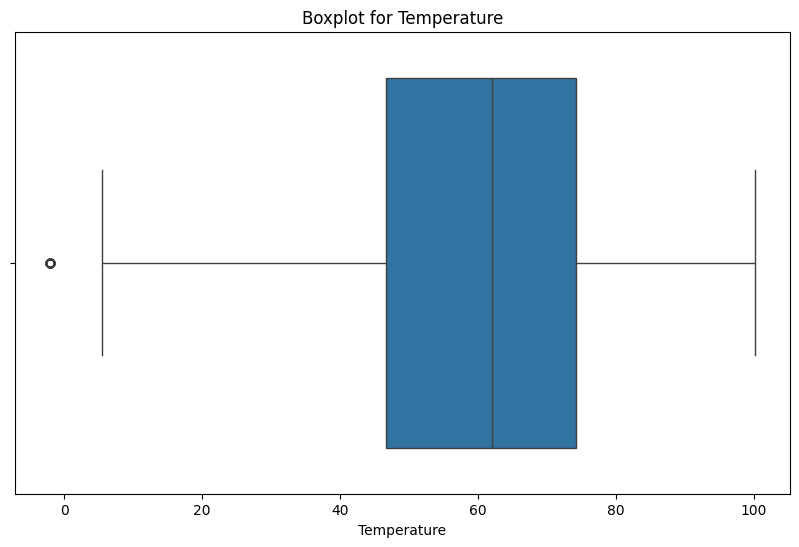

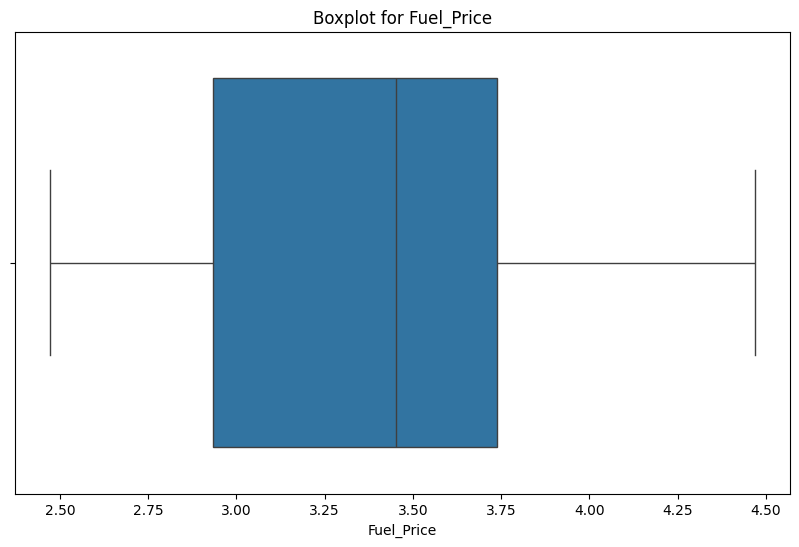

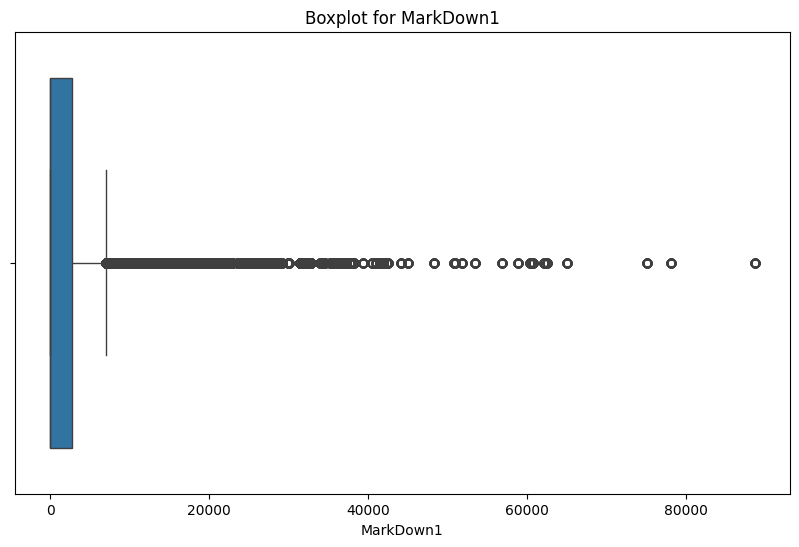

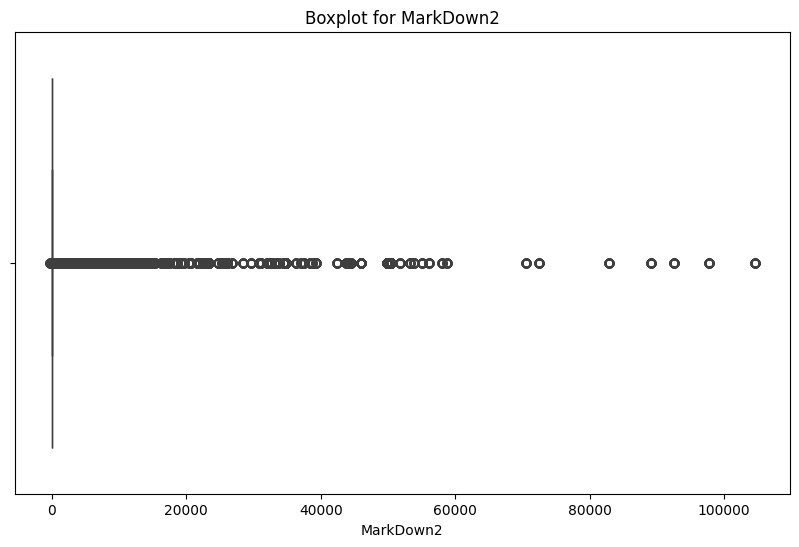

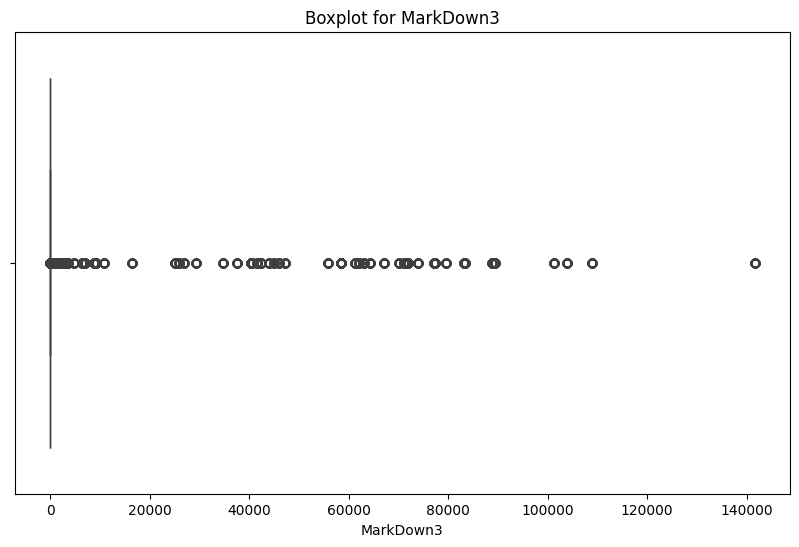

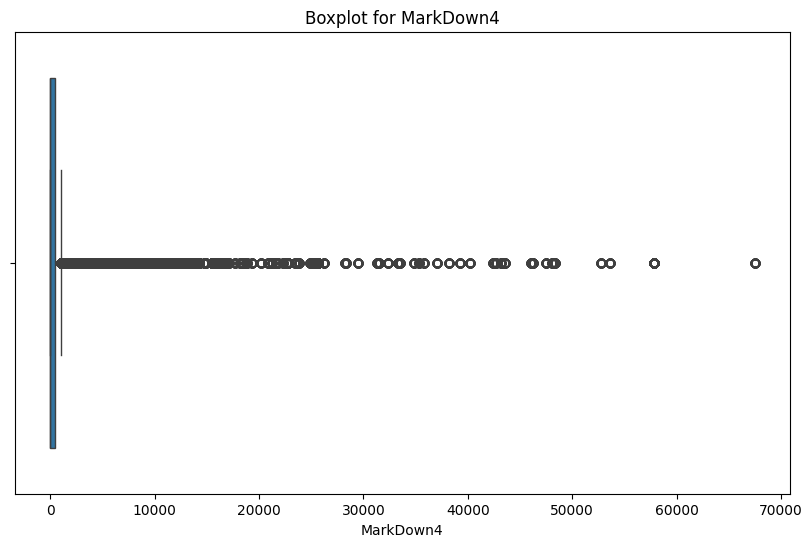

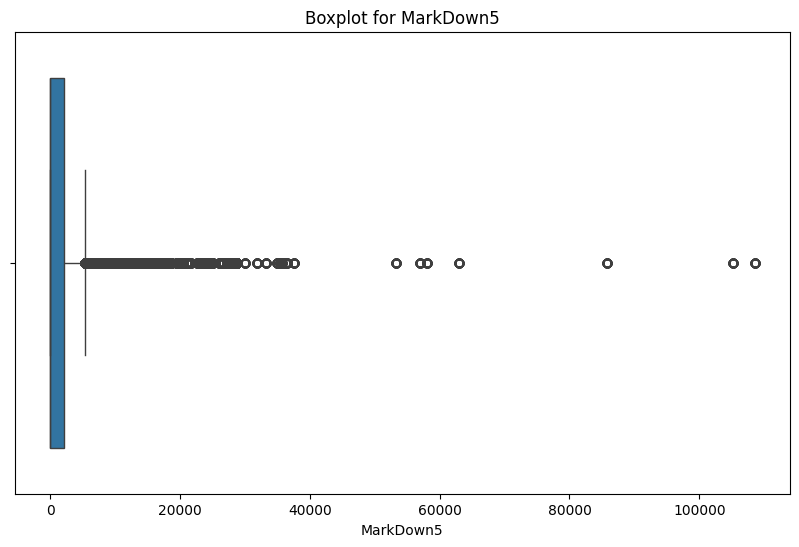

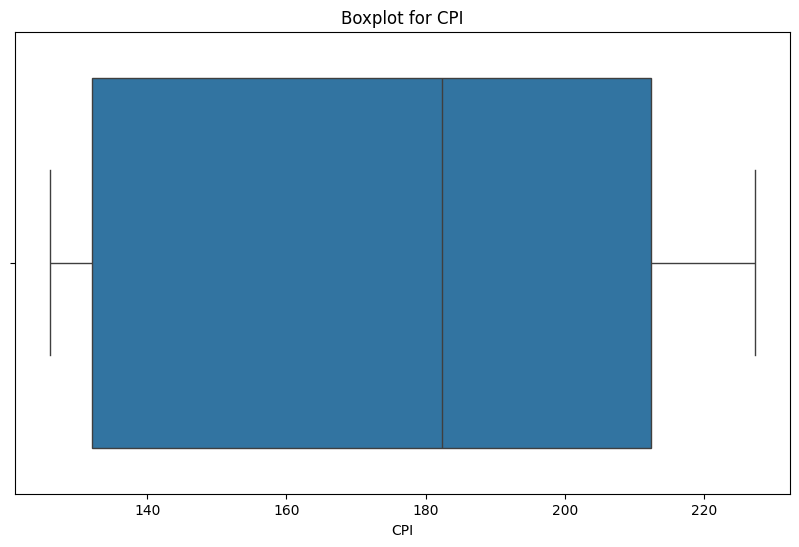

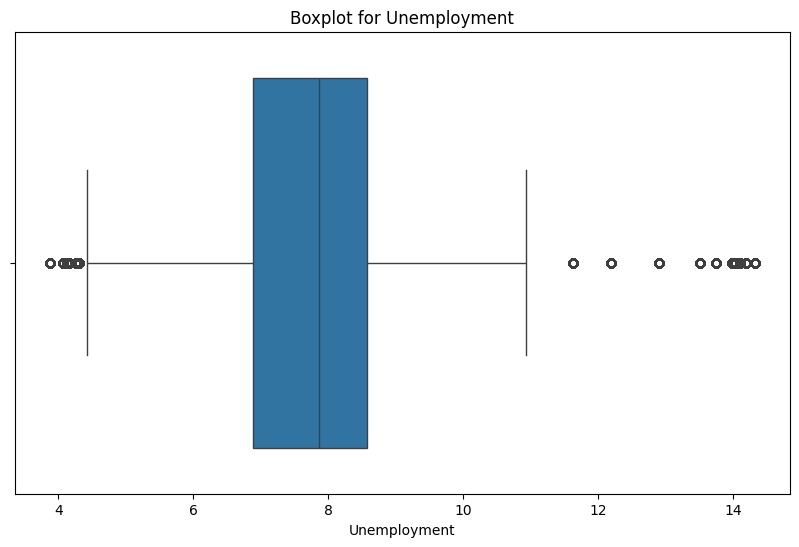

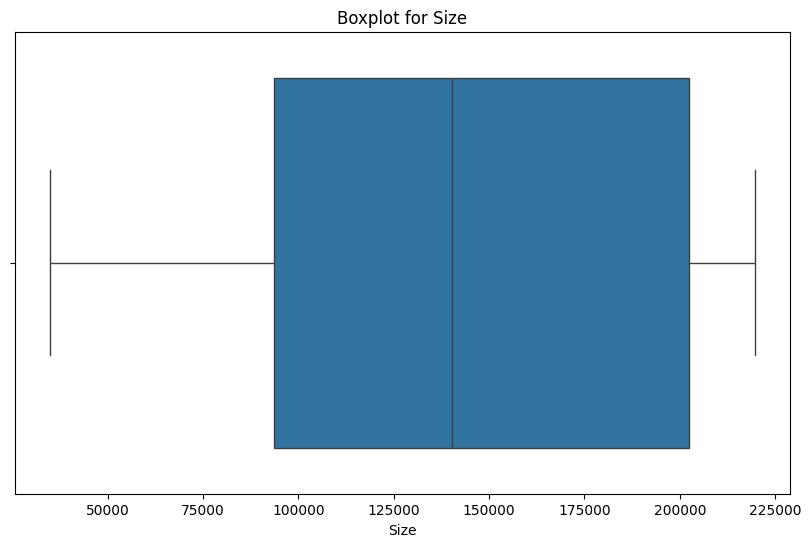

In [21]:
# Handling Outliers & Outlier treatments
numerical_features = final_df.select_dtypes(exclude=['object','bool']).columns
# Plotting boxplots to visually inspect for outliers
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=final_df[feature])
    plt.title(f'Boxplot for {feature}')
    plt.show()

In [22]:
#remove outliers
for i in numerical_features:
  #if final_df[i].dtypes!='object':
  if (final_df[i].dtype != 'object') and (final_df[i].dtype != 'bool'):
    q1=final_df[i].quantile(0.25)
    q3=final_df[i].quantile(0.75)
    iqr=q3-q1
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    final_df=final_df[(final_df[i]>=lb) & (final_df[i]<=ub)]

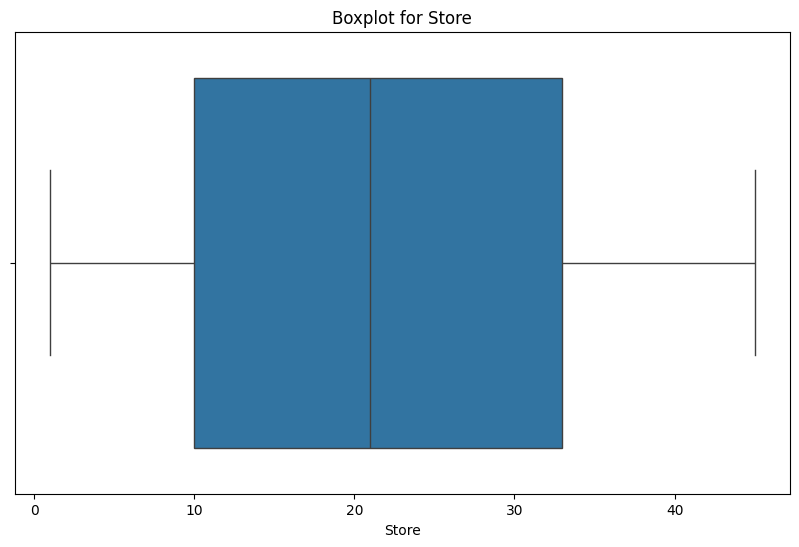

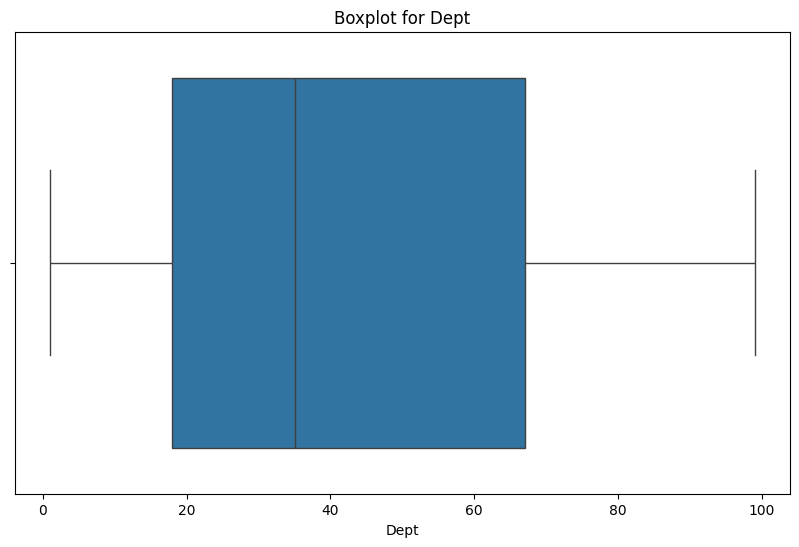

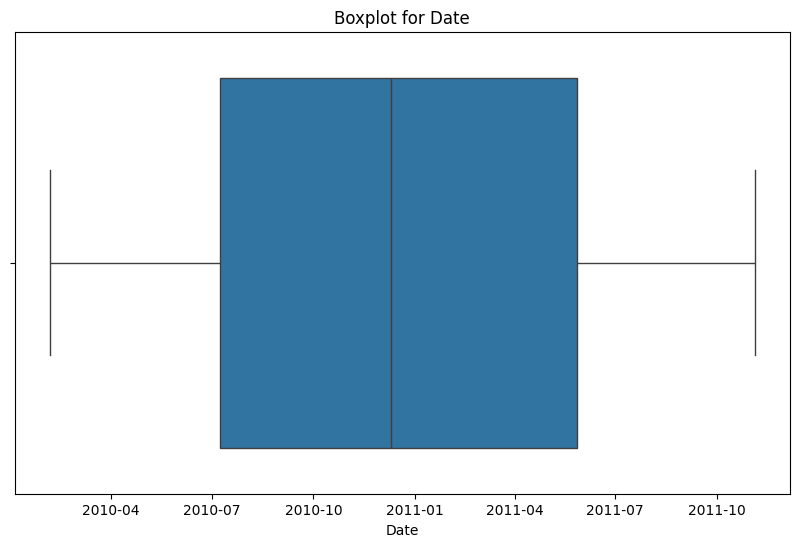

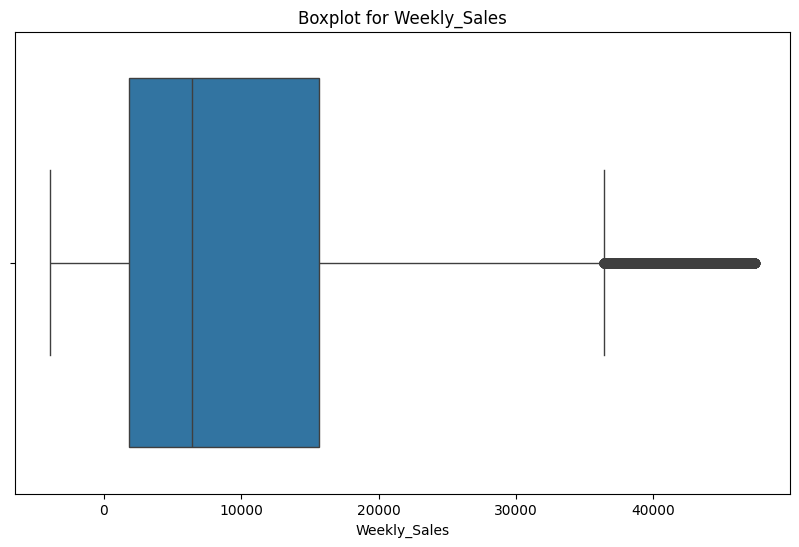

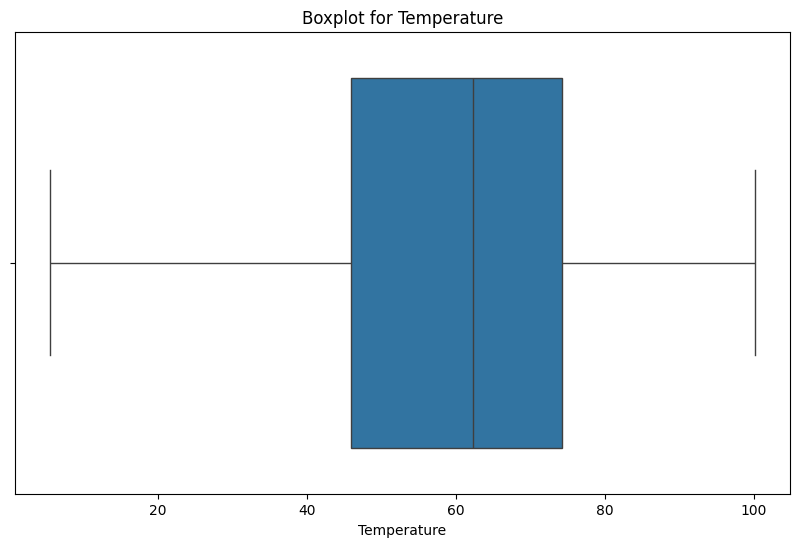

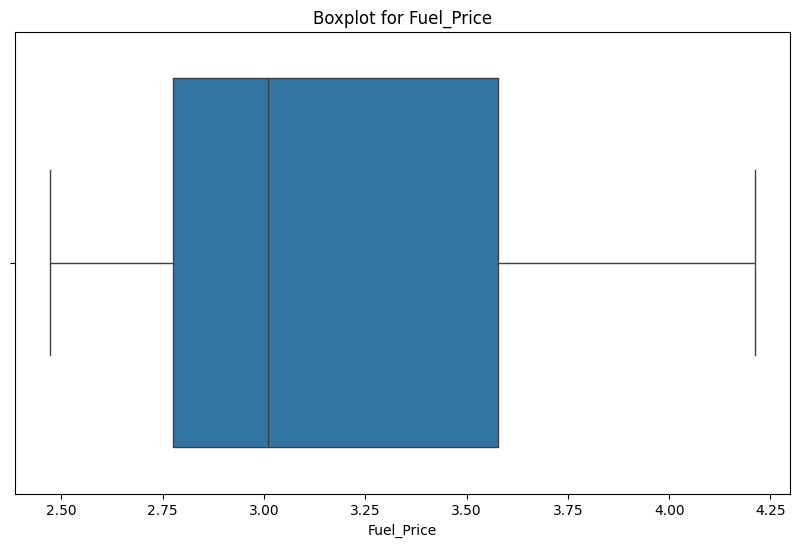

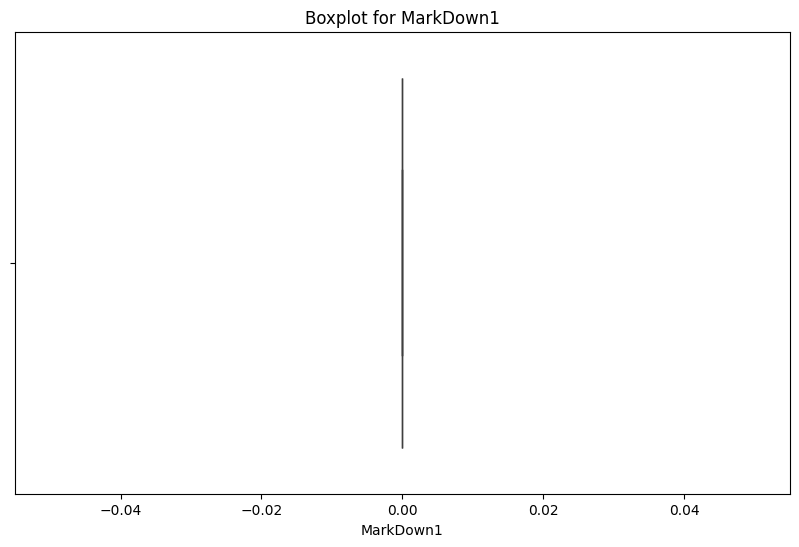

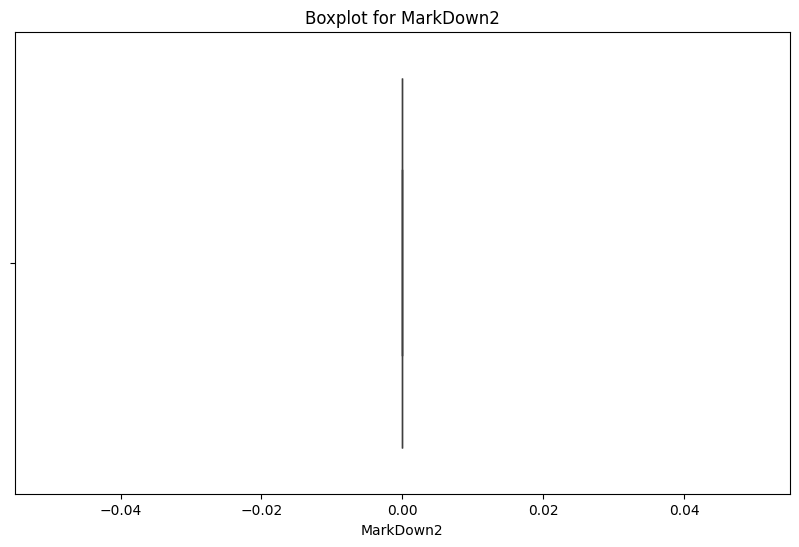

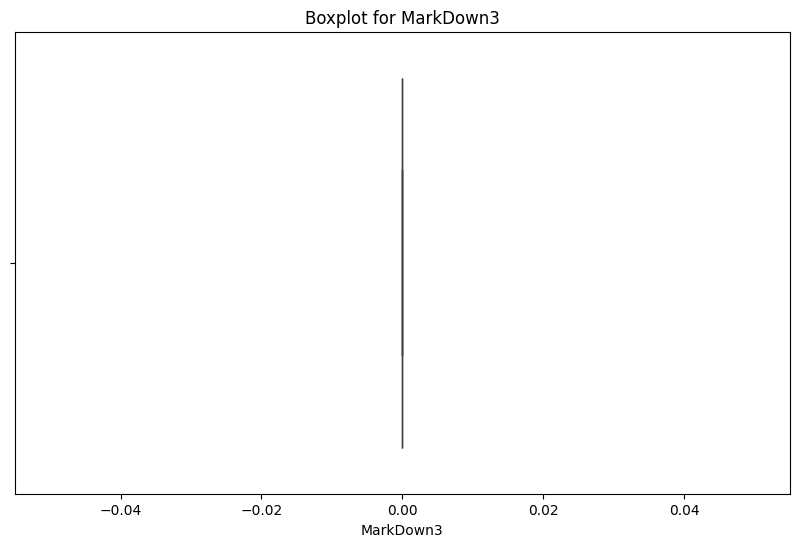

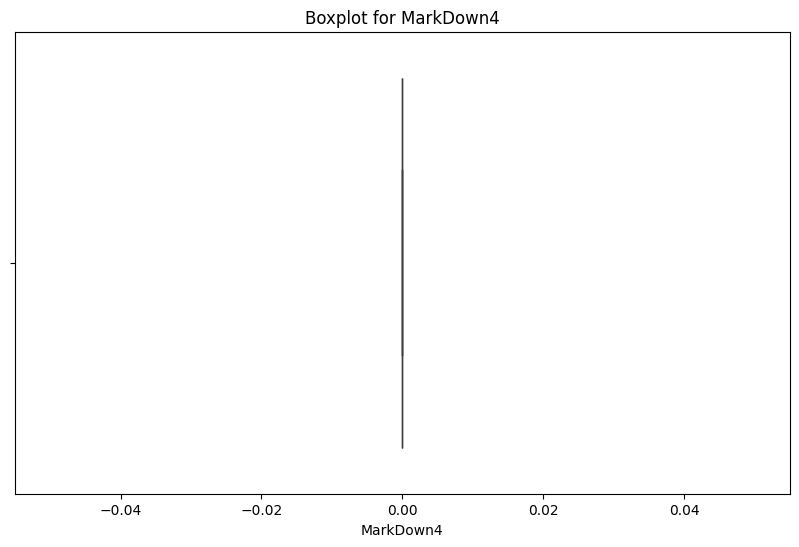

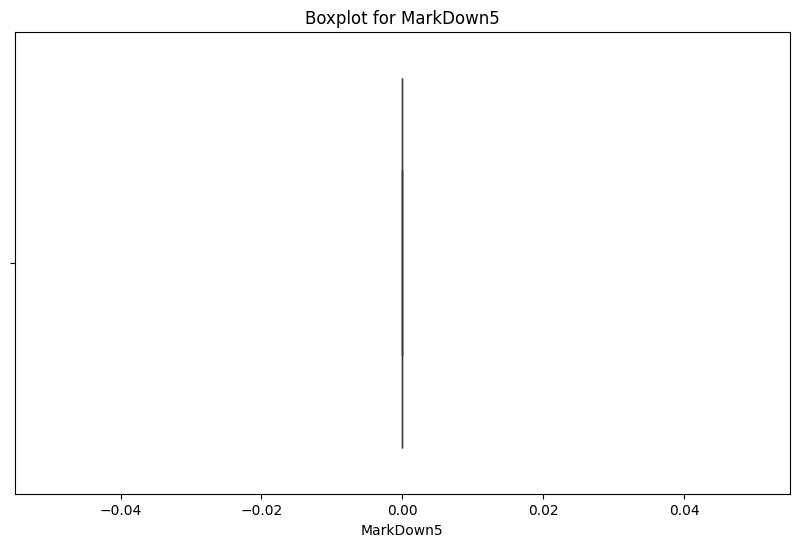

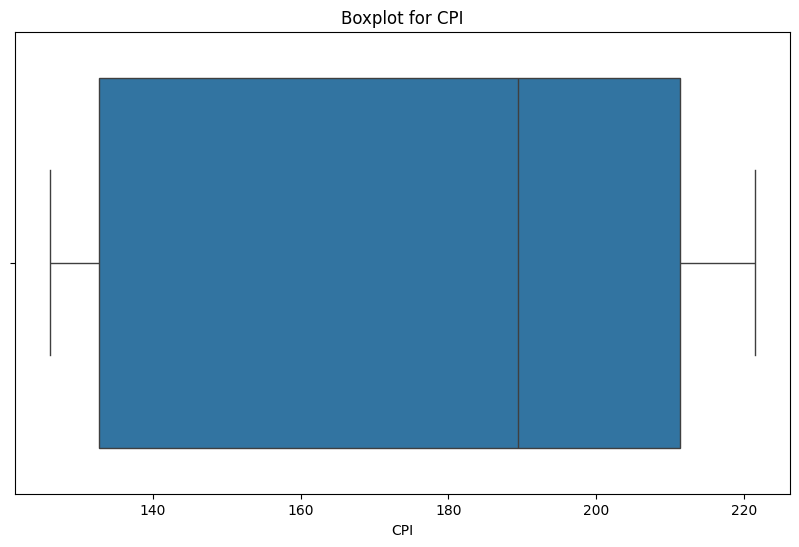

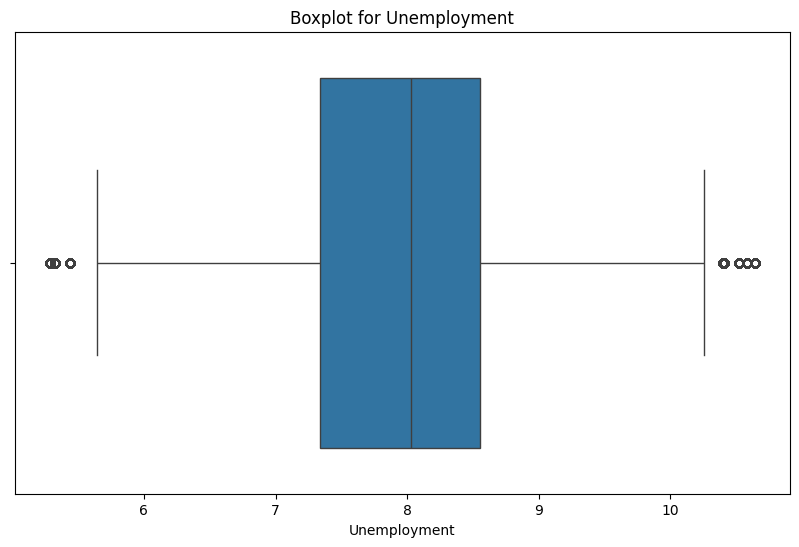

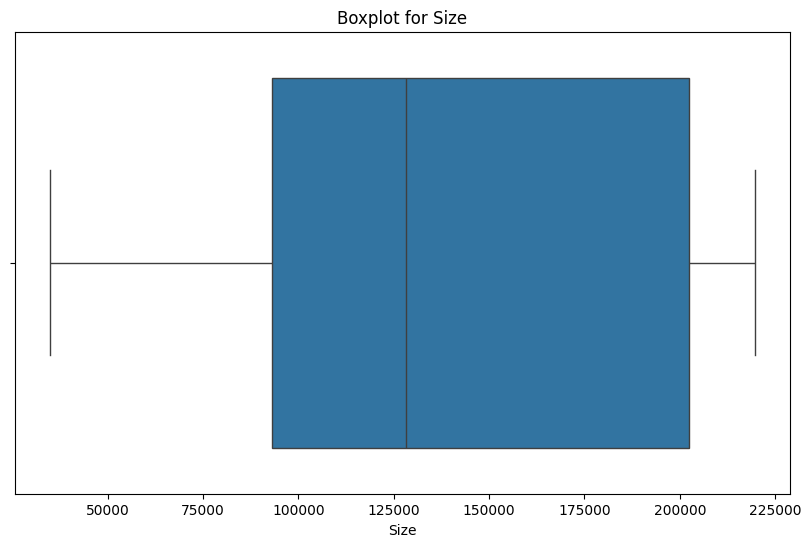

In [23]:
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=final_df[feature])
    plt.title(f'Boxplot for {feature}')
    plt.show()

In [24]:
final_df.shape

(225318, 17)

**FEATURE ENGG**

In [25]:
#feature engineering
final_df['Year']=final_df['Date'].dt.year
final_df['Month']=final_df['Date'].dt.month
final_df['Day']=final_df['Date'].dt.day

In [26]:
final_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,Year,Month,Day
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,2010,2,5
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,A,151315,2010,2,12
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,A,151315,2010,2,19
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,A,151315,2010,2,26
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,A,151315,2010,3,5


In [27]:
dayofweek_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

In [28]:

final_df['dayofweek'] = final_df['Date'].dt.dayofweek

In [29]:
# Calculate 3-day rolling average of sales
final_df['rollingavgsales'] = final_df['Weekly_Sales'].rolling(window=3).mean()

In [30]:
final_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,CPI,Unemployment,IsHoliday_y,Type,Size,Year,Month,Day,dayofweek,rollingavgsales
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,...,211.096358,8.106,False,A,151315,2010,2,5,4,NaN
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,...,211.242170,8.106,True,A,151315,2010,2,12,4,NaN
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,...,211.289143,8.106,False,A,151315,2010,2,19,4,37519.846667
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,...,211.319643,8.106,False,A,151315,2010,2,26,4,35679.526667
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,...,211.350143,8.106,False,A,151315,2010,3,5,4,27608.996667


In [31]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225318 entries, 0 to 421518
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Store            225318 non-null  int64         
 1   Dept             225318 non-null  int64         
 2   Date             225318 non-null  datetime64[ns]
 3   Weekly_Sales     225318 non-null  float64       
 4   IsHoliday_x      225318 non-null  bool          
 5   Temperature      225318 non-null  float64       
 6   Fuel_Price       225318 non-null  float64       
 7   MarkDown1        225318 non-null  float64       
 8   MarkDown2        225318 non-null  float64       
 9   MarkDown3        225318 non-null  float64       
 10  MarkDown4        225318 non-null  float64       
 11  MarkDown5        225318 non-null  float64       
 12  CPI              225318 non-null  float64       
 13  Unemployment     225318 non-null  float64       
 14  IsHoliday_y      225318 n

In [32]:
bool_cols     = ['IsHoliday_x', 'IsHoliday_y']
num_cols      = ['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
                 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
                 'Unemployment', 'Size', 'rollingavgsales',
                 'Year', 'Month', 'Day', 'dayofweek']

In [33]:
#convert boolean to integers
final_df[bool_cols] = final_df[bool_cols].astype(int)

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
final_df[num_cols] = scaler.fit_transform(final_df[num_cols])

In [35]:
final_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,CPI,Unemployment,IsHoliday_y,Type,Size,Year,Month,Day,dayofweek,rollingavgsales
0,1,1,2010-02-05,24924.50,0,-0.931299,-1.327619,0.0,0.0,0.0,...,0.997215,0.127118,0,A,0.274826,-0.935494,-1.416429,-1.196659,0.0,NaN
1,1,1,2010-02-12,46039.49,1,-1.133812,-1.381268,0.0,0.0,0.0,...,1.001053,0.127118,1,A,0.274826,-0.935494,-1.416429,-0.400661,0.0,NaN
2,1,1,2010-02-19,41595.55,0,-1.058136,-1.457271,0.0,0.0,0.0,...,1.002289,0.127118,0,A,0.274826,-0.935494,-1.416429,0.395338,0.0,2.451889
3,1,1,2010-02-26,19403.54,0,-0.701074,-1.352208,0.0,0.0,0.0,...,1.003092,0.127118,0,A,0.274826,-0.935494,-1.416429,1.191337,0.0,2.284953
4,1,1,2010-03-05,21827.90,0,-0.708002,-1.209145,0.0,0.0,0.0,...,1.003895,0.127118,0,A,0.274826,-0.935494,-1.097071,-1.196659,0.0,1.552872


In [36]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225318 entries, 0 to 421518
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Store            225318 non-null  int64         
 1   Dept             225318 non-null  int64         
 2   Date             225318 non-null  datetime64[ns]
 3   Weekly_Sales     225318 non-null  float64       
 4   IsHoliday_x      225318 non-null  int64         
 5   Temperature      225318 non-null  float64       
 6   Fuel_Price       225318 non-null  float64       
 7   MarkDown1        225318 non-null  float64       
 8   MarkDown2        225318 non-null  float64       
 9   MarkDown3        225318 non-null  float64       
 10  MarkDown4        225318 non-null  float64       
 11  MarkDown5        225318 non-null  float64       
 12  CPI              225318 non-null  float64       
 13  Unemployment     225318 non-null  float64       
 14  IsHoliday_y      225318 n

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

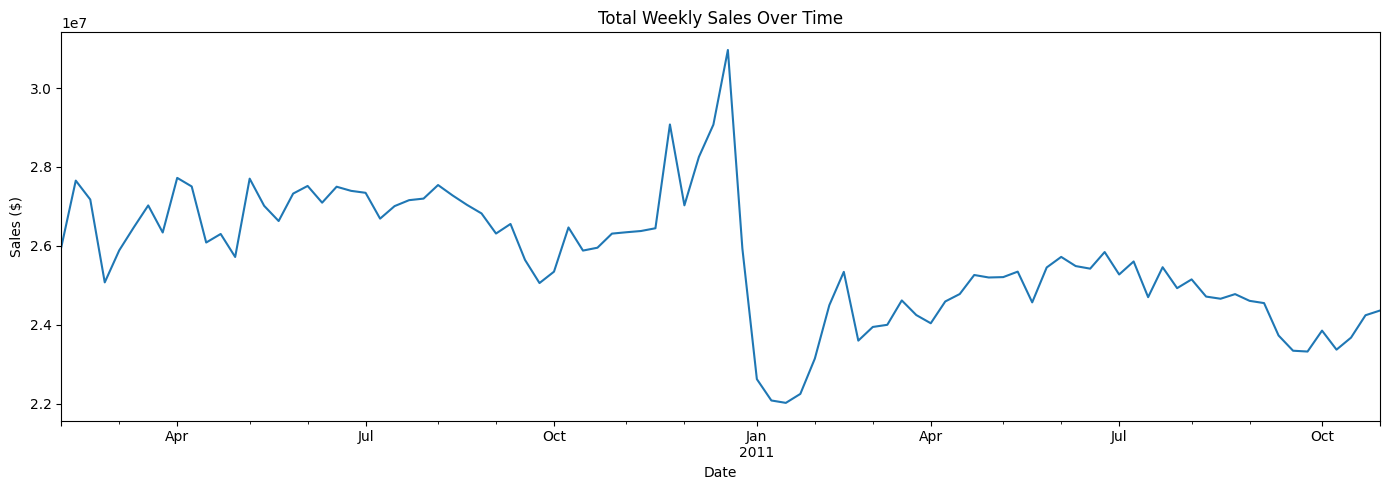

In [37]:
# Chart - 1 visualization code
#Sales over Time
final_df['Date'] = pd.to_datetime(final_df['Date'])
weekly_trend = final_df.groupby('Date')['Weekly_Sales'].sum()

plt.figure(figsize=(14, 5))
weekly_trend.plot()
plt.title('Total Weekly Sales Over Time')
plt.ylabel('Sales ($)')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

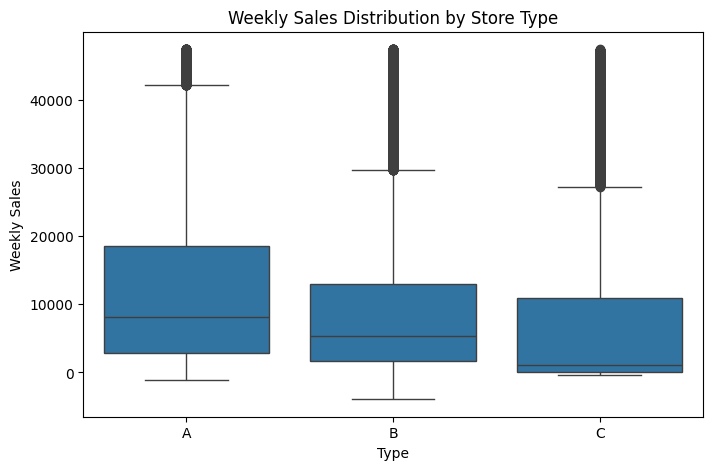

In [38]:
# Chart - 2 visualization code
#Sales by Store Type
plt.figure(figsize=(8, 5))
sns.boxplot(data=final_df, x='Type', y='Weekly_Sales')
plt.title('Weekly Sales Distribution by Store Type')
plt.ylabel('Weekly Sales')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3-Effect of Holidays

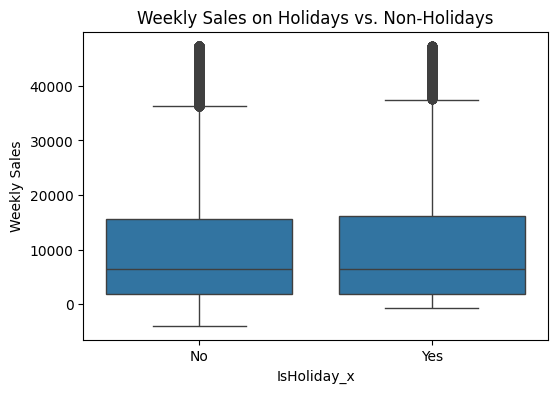

In [39]:
# Chart - 3 visualization code
plt.figure(figsize=(6, 4))
sns.boxplot(data=final_df, x='IsHoliday_x', y='Weekly_Sales')
plt.title('Weekly Sales on Holidays vs. Non-Holidays')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Weekly Sales')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4-Sales vs. Fuel Price

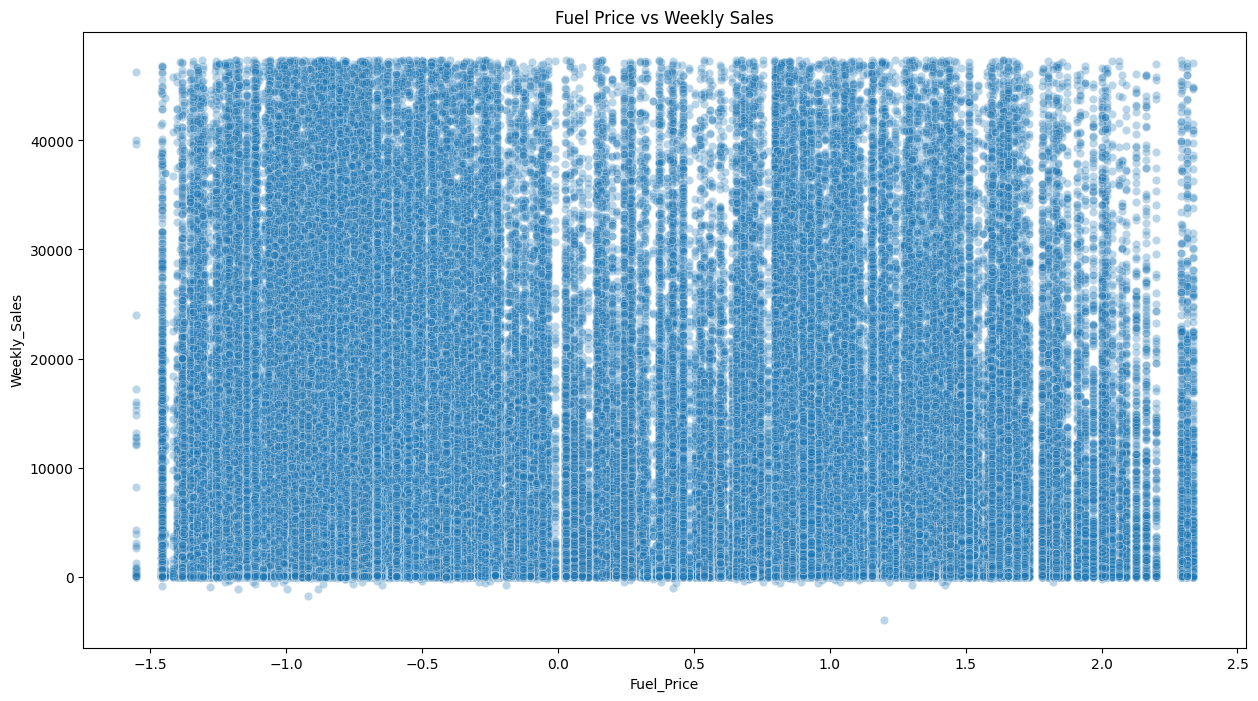

In [40]:
# Chart - 4 visualization code
plt.figure(figsize=(15, 8))
sns.scatterplot(data=final_df, x='Fuel_Price', y='Weekly_Sales', alpha=0.3)
plt.title('Fuel Price vs Weekly Sales')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5-Rolling Average vs Actual Sales

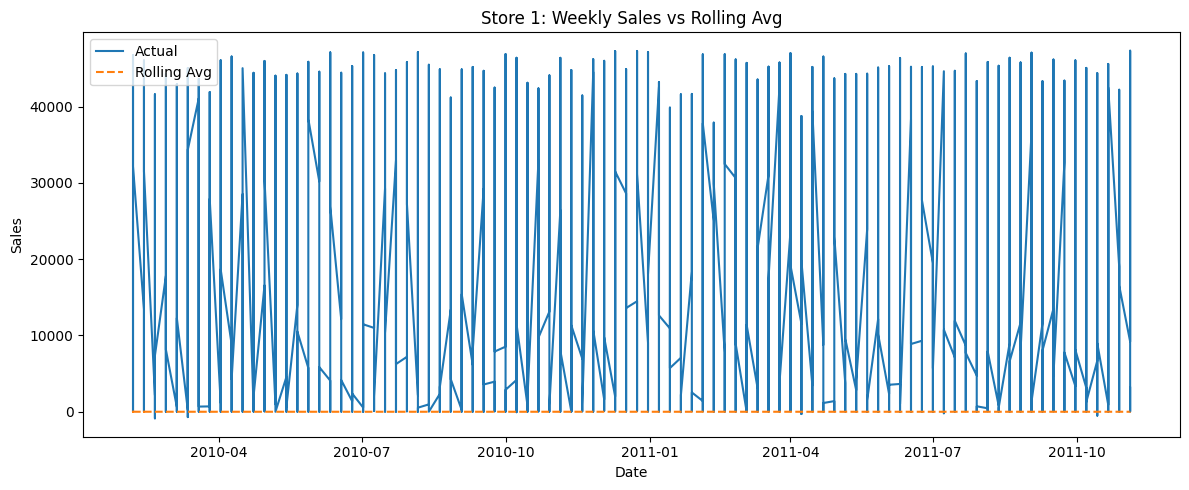

In [41]:
# Chart - 5 visualization code
plt.figure(figsize=(12, 5))
sample_store = final_df[final_df['Store'] == final_df['Store'].iloc[0]].sort_values('Date')
plt.plot(sample_store['Date'], sample_store['Weekly_Sales'], label='Actual')
plt.plot(sample_store['Date'], sample_store['rollingavgsales'], label='Rolling Avg', linestyle='--')
plt.title(f'Store {sample_store["Store"].iloc[0]}: Weekly Sales vs Rolling Avg')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6-Sales by Day of Week

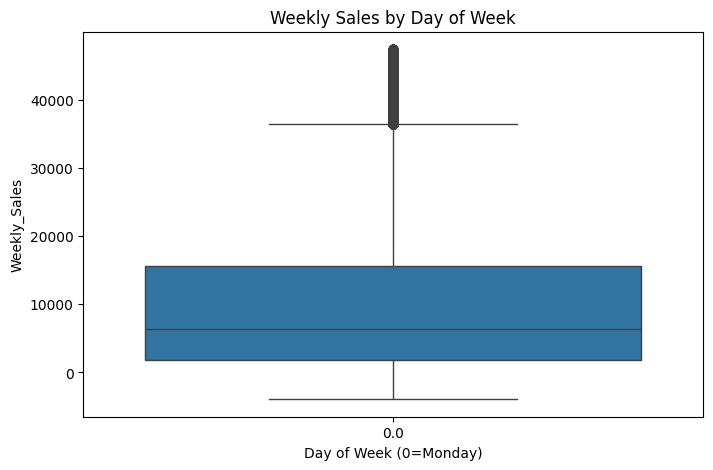

In [42]:
# Chart - 6 visualization code
plt.figure(figsize=(8, 5))
sns.boxplot(data=final_df, x='dayofweek', y='Weekly_Sales')
plt.title('Weekly Sales by Day of Week')
plt.xlabel('Day of Week (0=Monday)')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7-Heatmap of Correlations

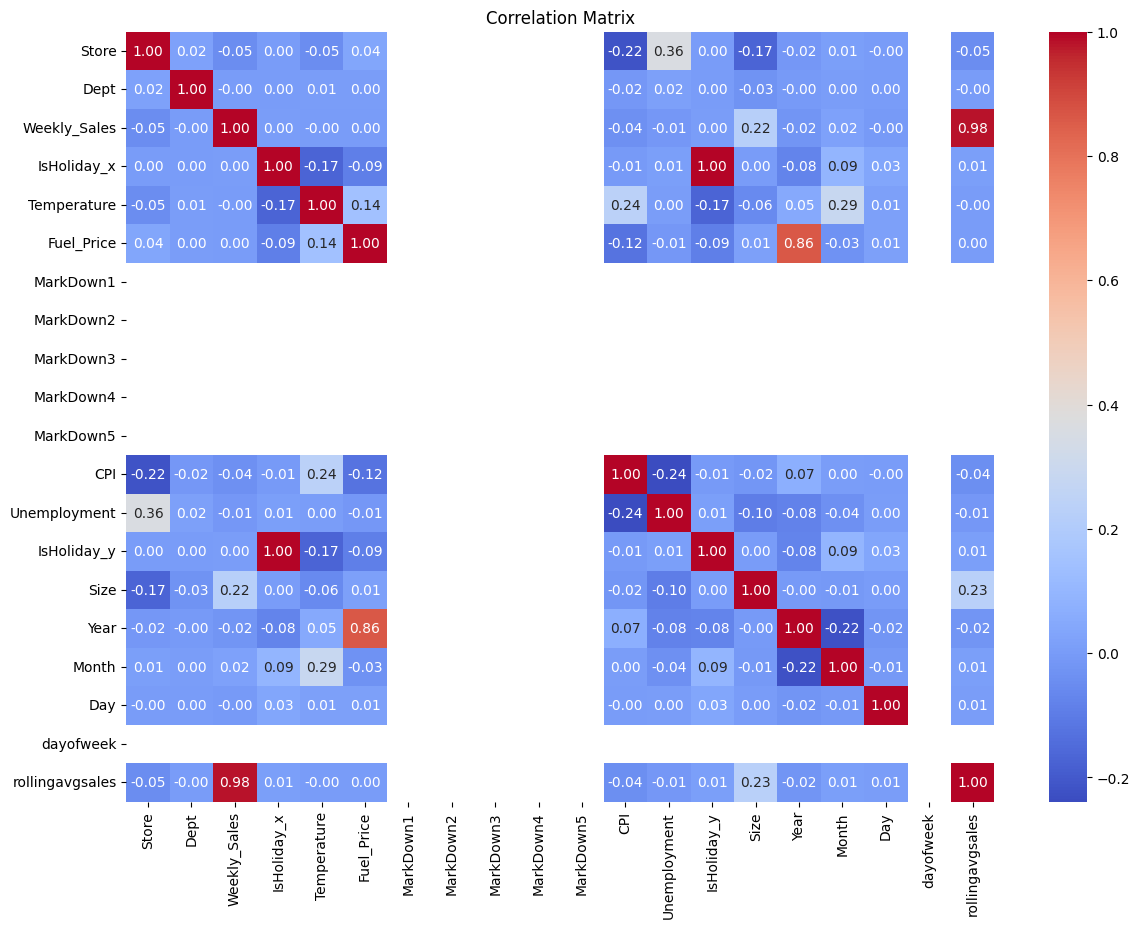

In [43]:
# Chart - 7 visualization code
plt.figure(figsize=(14, 10))
sns.heatmap(final_df.drop(columns=['Date', 'Type']).corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8-Sales Distribution by Store

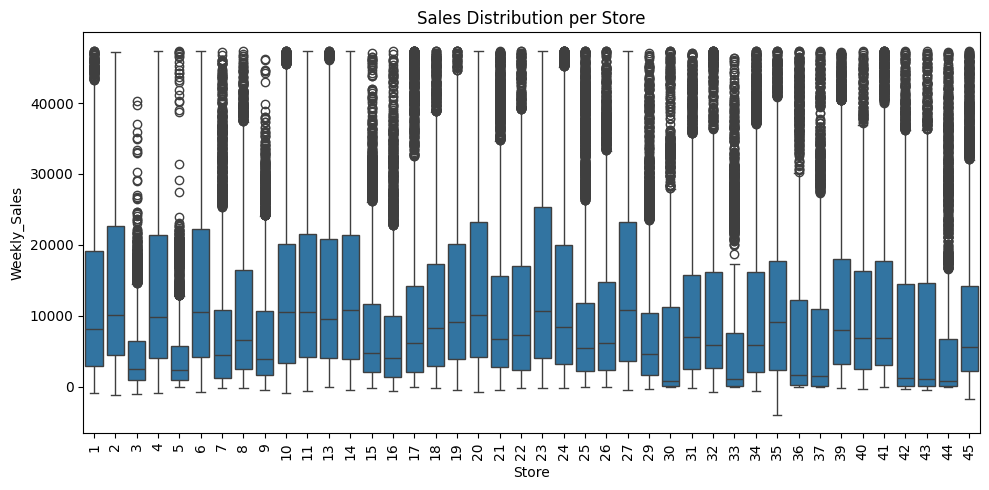

In [44]:
# Chart - 8 visualization code
plt.figure(figsize=(10, 5))
sns.boxplot(data=final_df, x='Store', y='Weekly_Sales')
plt.title('Sales Distribution per Store')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9- Sales by Department (Top 10)

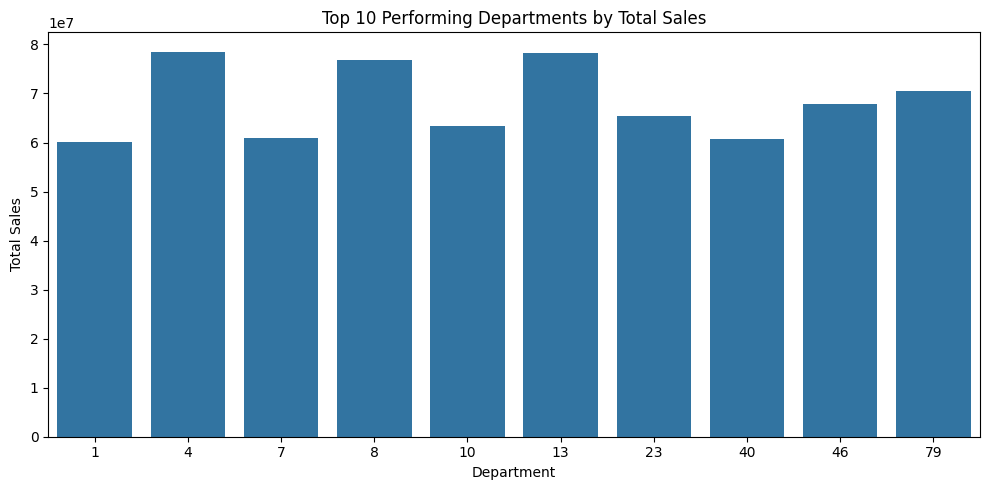

In [45]:
# Chart - 9 visualization code
top_depts = final_df.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_depts.index, y=top_depts.values)
plt.title('Top 10 Performing Departments by Total Sales')
plt.xlabel('Department')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10-Markdown Impact on Sales

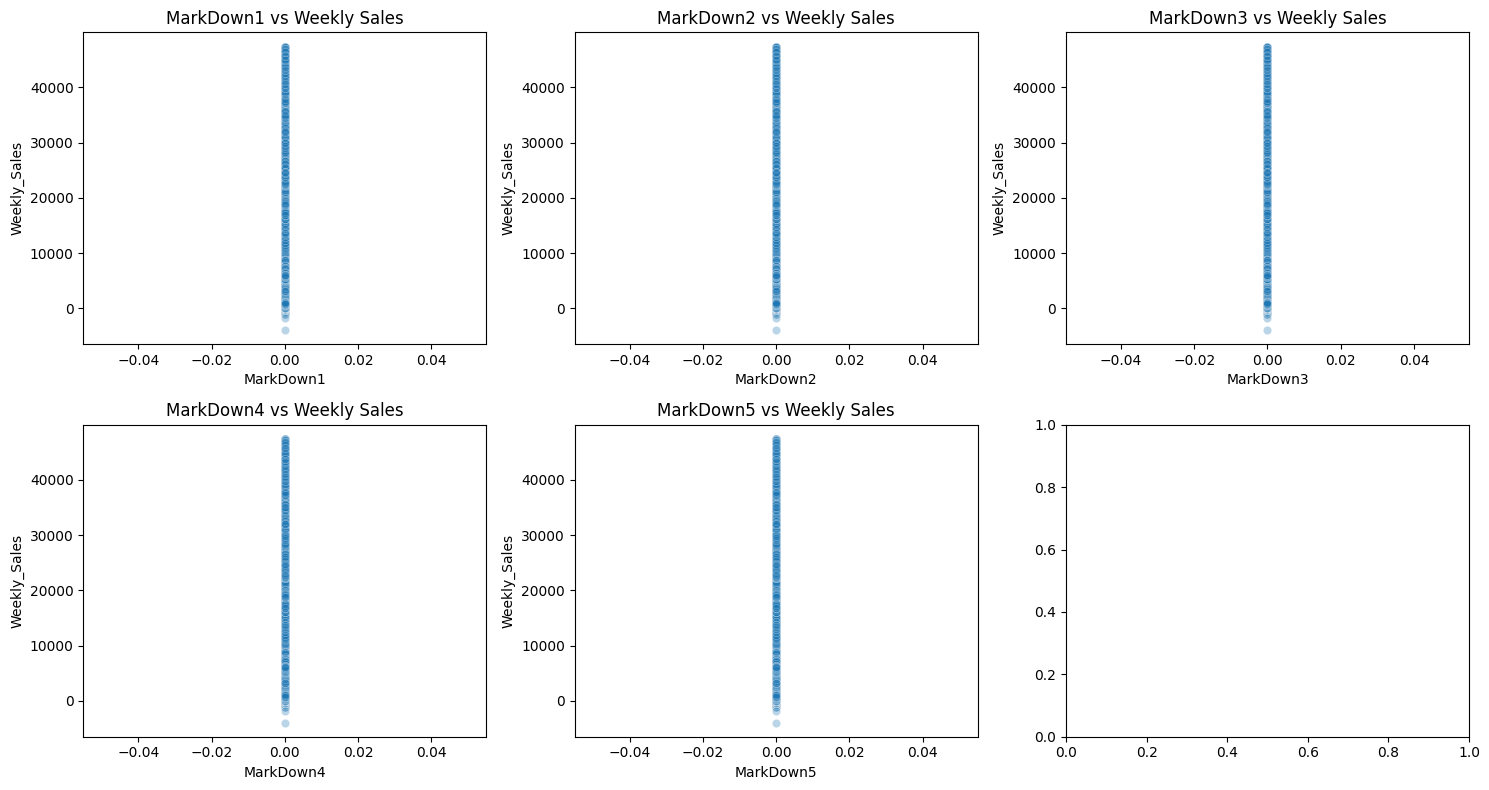

In [46]:
# Chart - 10 visualization code
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
for i, col in enumerate(markdown_cols):
    ax = axs[i // 3, i % 3]
    sns.scatterplot(data=final_df, x=col, y='Weekly_Sales', alpha=0.3, ax=ax)
    ax.set_title(f'{col} vs Weekly Sales')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11-Effect of CPI and Unemployment

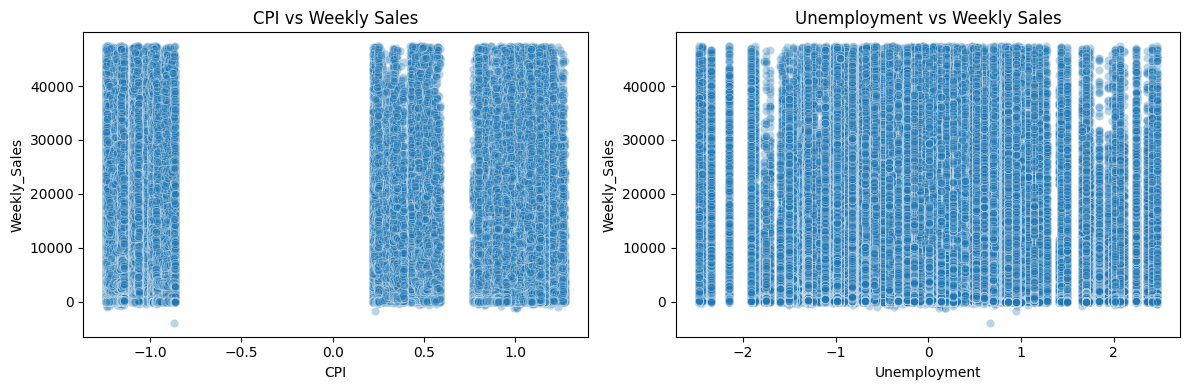

In [47]:
# Chart - 11 visualization code
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(data=final_df, x='CPI', y='Weekly_Sales', alpha=0.3, ax=axs[0])
axs[0].set_title('CPI vs Weekly Sales')

sns.scatterplot(data=final_df, x='Unemployment', y='Weekly_Sales', alpha=0.3, ax=axs[1])
axs[1].set_title('Unemployment vs Weekly Sales')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12-Holiday Sales Pattern by Year

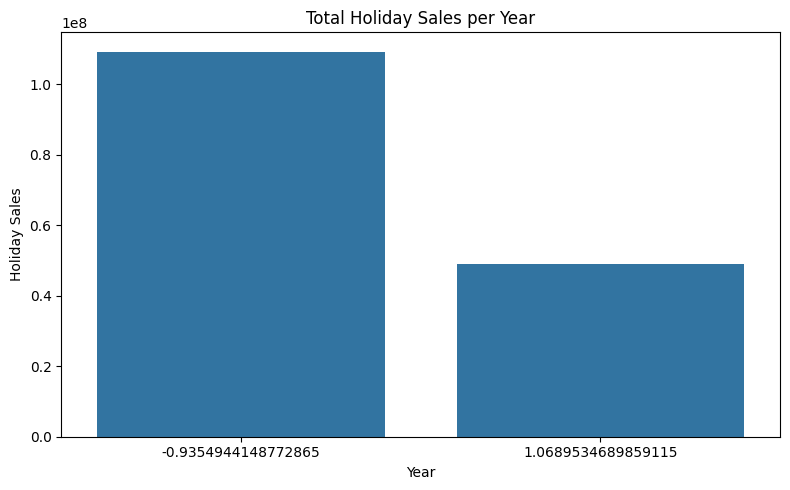

In [48]:
# Chart - 12 visualization code
holiday_sales = final_df[final_df['IsHoliday_x'] == 1]
holiday_summary = holiday_sales.groupby('Year')['Weekly_Sales'].sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=holiday_summary.index, y=holiday_summary.values)
plt.title('Total Holiday Sales per Year')
plt.ylabel('Holiday Sales')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13-Sales Trend by Type Over Time

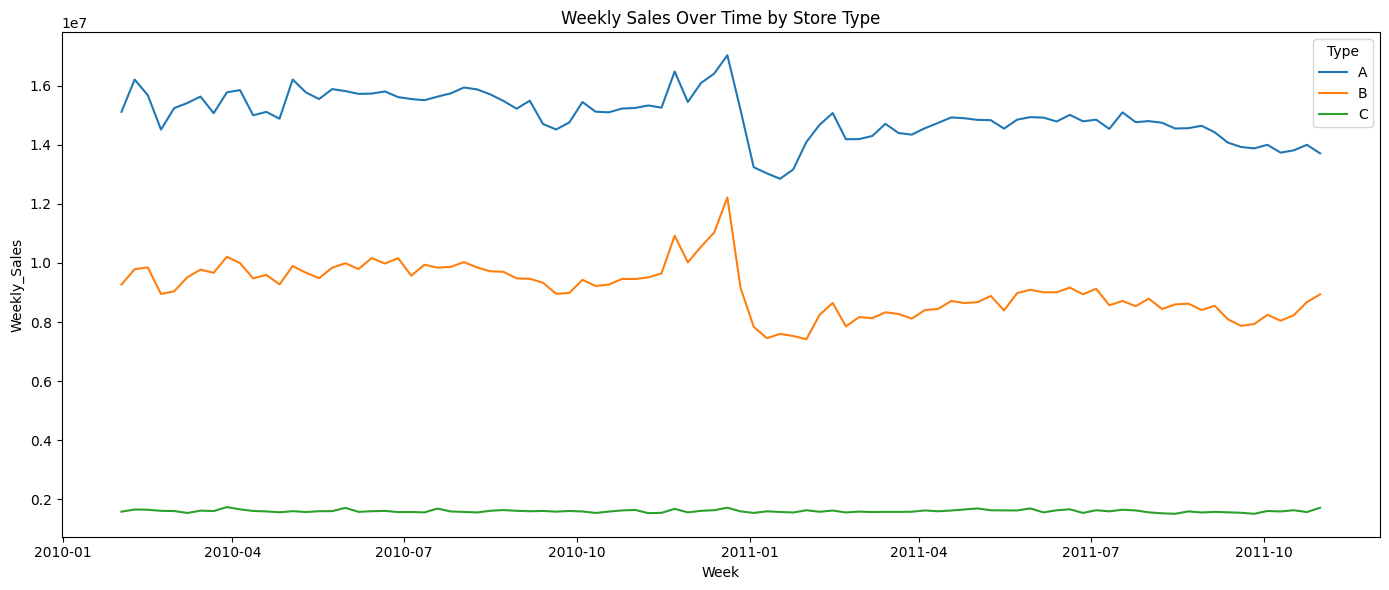

In [49]:
# Chart - 13 visualization code
final_df['Week'] = final_df['Date'].dt.to_period('W').apply(lambda r: r.start_time)
sales_by_type = final_df.groupby(['Week', 'Type'])['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=sales_by_type, x='Week', y='Weekly_Sales', hue='Type')
plt.title('Weekly Sales Over Time by Store Type')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Sales Variability per Store

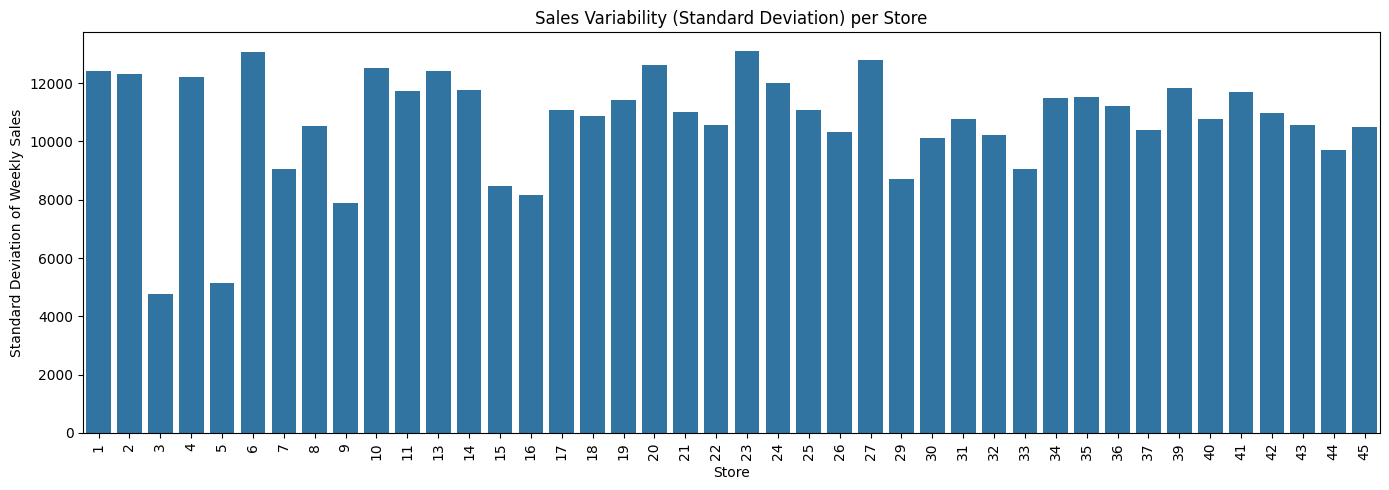

In [50]:
# Correlation Heatmap visualization code
store_std = final_df.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False)

plt.figure(figsize=(14, 5))
sns.barplot(x=store_std.index, y=store_std.values)
plt.title('Sales Variability (Standard Deviation) per Store')
plt.ylabel('Standard Deviation of Weekly Sales')
plt.xlabel('Store')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Sales Trend on Holidays vs. Non-Holidays Over Time

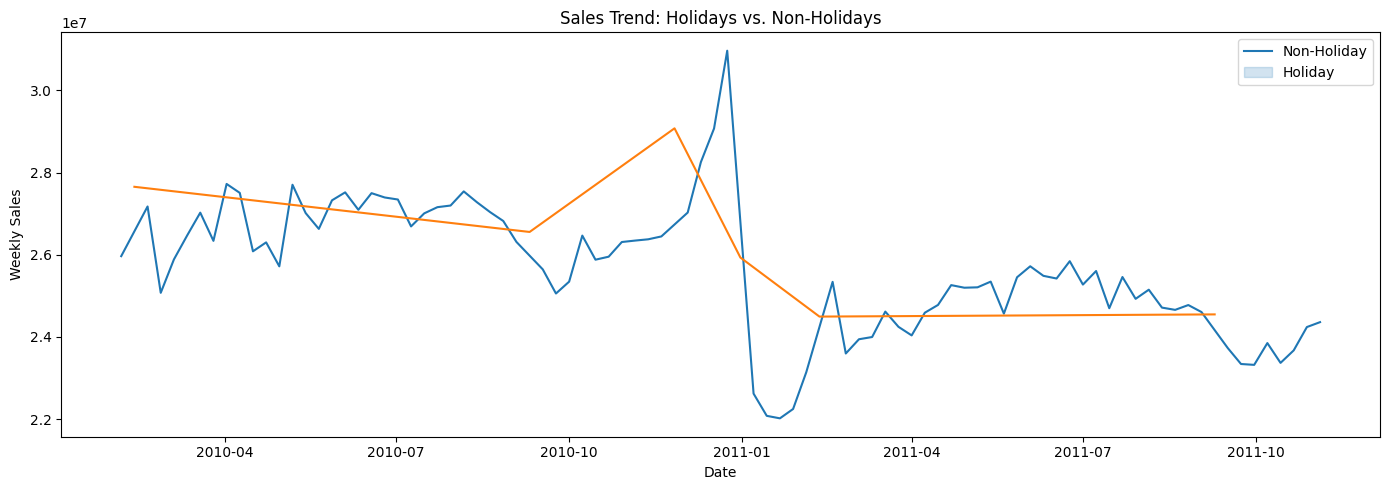

In [51]:
# Pair Plot visualization code
holiday_trend = final_df.groupby(['Date', 'IsHoliday_x'])['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(14, 5))
sns.lineplot(data=holiday_trend, x='Date', y='Weekly_Sales', hue='IsHoliday_x')
plt.title('Sales Trend: Holidays vs. Non-Holidays')
plt.ylabel('Weekly Sales')
plt.xlabel('Date')
plt.legend(labels=['Non-Holiday', 'Holiday'])
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

In [52]:
final_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Unemployment,IsHoliday_y,Type,Size,Year,Month,Day,dayofweek,rollingavgsales,Week
0,1,1,2010-02-05,24924.50,0,-0.931299,-1.327619,0.0,0.0,0.0,...,0.127118,0,A,0.274826,-0.935494,-1.416429,-1.196659,0.0,NaN,2010-02-01
1,1,1,2010-02-12,46039.49,1,-1.133812,-1.381268,0.0,0.0,0.0,...,0.127118,1,A,0.274826,-0.935494,-1.416429,-0.400661,0.0,NaN,2010-02-08
2,1,1,2010-02-19,41595.55,0,-1.058136,-1.457271,0.0,0.0,0.0,...,0.127118,0,A,0.274826,-0.935494,-1.416429,0.395338,0.0,2.451889,2010-02-15
3,1,1,2010-02-26,19403.54,0,-0.701074,-1.352208,0.0,0.0,0.0,...,0.127118,0,A,0.274826,-0.935494,-1.416429,1.191337,0.0,2.284953,2010-02-22
4,1,1,2010-03-05,21827.90,0,-0.708002,-1.209145,0.0,0.0,0.0,...,0.127118,0,A,0.274826,-0.935494,-1.097071,-1.196659,0.0,1.552872,2010-03-01


In [53]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225318 entries, 0 to 421518
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Store            225318 non-null  int64         
 1   Dept             225318 non-null  int64         
 2   Date             225318 non-null  datetime64[ns]
 3   Weekly_Sales     225318 non-null  float64       
 4   IsHoliday_x      225318 non-null  int64         
 5   Temperature      225318 non-null  float64       
 6   Fuel_Price       225318 non-null  float64       
 7   MarkDown1        225318 non-null  float64       
 8   MarkDown2        225318 non-null  float64       
 9   MarkDown3        225318 non-null  float64       
 10  MarkDown4        225318 non-null  float64       
 11  MarkDown5        225318 non-null  float64       
 12  CPI              225318 non-null  float64       
 13  Unemployment     225318 non-null  float64       
 14  IsHoliday_y      225318 n

## ***5. Hypothesis Testing***-Do Sales Differ on Holidays vs Non-Holidays?

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1
H0 (Null): There is no difference in average sales on holidays vs non-holidays.

H1 (Alt): There is a significant difference in average sales on holidays vs non-holidays.

In [54]:
from scipy.stats import ttest_ind

holiday_sales = final_df[final_df['IsHoliday_x'] == True]['Weekly_Sales']
non_holiday_sales = final_df[final_df['IsHoliday_x'] == False]['Weekly_Sales']

t_stat, p_value = ttest_ind(holiday_sales, non_holiday_sales, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 1.923647087875709, P-value: 0.05441555230232973


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [55]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2-Do Sales Differ Across Store Types (A, B, C)?

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.
H0: All store types have the same mean sales.

H1: At least one store type has different mean sales.

#### 2. Perform an appropriate statistical test.

In [56]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import f_oneway

type_A = final_df[final_df['Type'] == 'A']['Weekly_Sales']
type_B = final_df[final_df['Type'] == 'B']['Weekly_Sales']
type_C = final_df[final_df['Type'] == 'C']['Weekly_Sales']

f_stat, p_value = f_oneway(type_A, type_B, type_C)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

F-statistic: 3068.1250371810547, P-value: 0.0


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3-Is There a Correlation Between Sales and CPI or Temperature?

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.H0: There is no correlation between weekly sales and CPI (or Temperature).

H1: There is a significant correlation.

#### 2. Perform an appropriate statistical test.

In [57]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

corr_cpi, p_cpi = pearsonr(final_df['Weekly_Sales'], final_df['CPI'])
corr_temp, p_temp = pearsonr(final_df['Weekly_Sales'], final_df['Temperature'])

print(f"Sales vs CPI: r = {corr_cpi}, p = {p_cpi}")
print(f"Sales vs Temp: r = {corr_temp}, p = {p_temp}")

Sales vs CPI: r = -0.040098874874725764, p = 7.720088465380421e-81
Sales vs Temp: r = -0.0004872979712766452, p = 0.8170757348024907


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [58]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [59]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [60]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [61]:
# Expand Contraction

#### 2. Lower Casing

In [62]:
# Lower Casing

#### 3. Removing Punctuations

In [63]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [64]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [65]:
# Remove Stopwords

In [66]:
# Remove White spaces

#### 6. Rephrase Text

In [67]:
# Rephrase Text

#### 7. Tokenization

In [68]:
# Tokenization

#### 8. Text Normalization

In [69]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [70]:
# POS Taging

#### 10. Text Vectorization

In [71]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [72]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [73]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [74]:
# Transform Your data

### 6. Data Scaling

In [75]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [76]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [77]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [78]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1-k-means

In [79]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model
# Grouping to create segments at Store-Dept level
# Step-by-Step: Customer Segmentation
# Step 1: Create Aggregated Features (Customer Proxies)
# Since there are no individual customer records, we simulate behavior at the store-department level.
segment_data = final_df.groupby(['Store', 'Dept']).agg({
    'Weekly_Sales': 'mean',
    'MarkDown1': 'mean',
    'MarkDown2': 'mean',
    'MarkDown3': 'mean',
    'MarkDown4': 'mean',
    'MarkDown5': 'mean',
    'CPI': 'mean',
    'Unemployment': 'mean',
    'Temperature': 'mean',
    'Fuel_Price': 'mean',
    'Size': 'first',  # Store size
    'Type': 'first'   # Store type
}).reset_index()


In [80]:
# Step 2: Preprocess Data for Clustering
# Convert categorical data and scale features
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode store Type
segment_data['Type'] = LabelEncoder().fit_transform(segment_data['Type'])

# Select numerical features for clustering
features = segment_data.drop(columns=['Store', 'Dept'])  # Exclude IDs

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [81]:
#Step 3: Apply K-Means Clustering
from sklearn.cluster import KMeans

# Choose number of clusters (start with 3–5)
kmeans = KMeans(n_clusters=4, random_state=42)
segment_data['Cluster'] = kmeans.fit_predict(scaled_features)

In [82]:
#Step 4: Analyze the Segments
# View characteristics of each segment
cluster_summary = segment_data.groupby('Cluster').mean()
print(cluster_summary)

             Store       Dept  Weekly_Sales  MarkDown1  MarkDown2  MarkDown3  \
Cluster                                                                        
0        23.857692  46.123077   8850.530271        0.0        0.0        0.0   
1        25.136410  44.384615  10990.516491        0.0        0.0        0.0   
2        17.512761  42.991879  14246.951728        0.0        0.0        0.0   
3        24.089606  43.329749   5674.650699        0.0        0.0        0.0   

         MarkDown4  MarkDown5       CPI  Unemployment  Temperature  \
Cluster                                                              
0              0.0        0.0 -0.358359     -0.963897    -0.685422   
1              0.0        0.0 -0.950693      0.628558    -0.148859   
2              0.0        0.0  0.678501     -0.266341     0.163863   
3              0.0        0.0  0.803287     -0.014618     0.570679   

         Fuel_Price      Size      Type  
Cluster                                  
0         -0.2

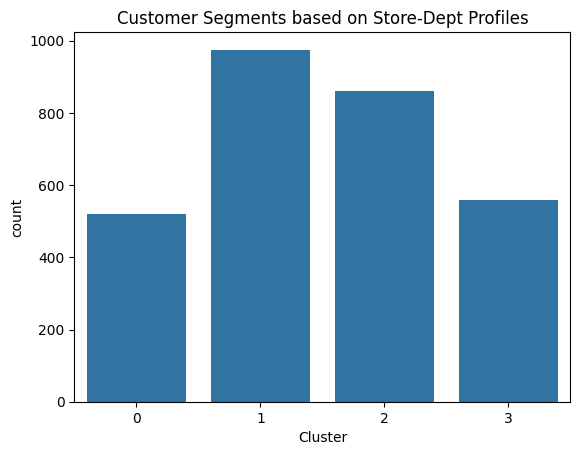

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Cluster', data=segment_data)
plt.title("Customer Segments based on Store-Dept Profiles")
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [84]:
print(f"Inertia: {kmeans.inertia_:.2f}")

Inertia: 11835.50


**Market Basket Analysis**

In [85]:
 #Pivot the data to get basket-like format
 # Create basket where rows = Store-Date, columns = Depts (items), values = Sales
basket = final_df.pivot_table(
    index=['Store', 'Date'],
    columns='Dept',
    values='Weekly_Sales',
    fill_value=0
)

In [86]:
#Convert to binary (0 or 1) for association rules
basket_binary = basket.applymap(lambda x: 1 if x > 0 else 0)

In [ ]:
#Apply Apriori and Generate Rules
from mlxtend.frequent_patterns import apriori, association_rules

frequent_items = apriori(basket_binary, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_items, metric='lift', min_threshold=1.0)
rules.sort_values(by='confidence', ascending=False).head()

In [ ]:
# Segmentation (Advanced)
# Use this after Market Basket to profile types of stores/customers.
# Example Segmentation Based on Dept Preferences
# You can segment stores by dominant departments using the binary basket.
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scale basket data
scaler = StandardScaler()
basket_scaled = scaler.fit_transform(basket)

# KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
basket['Cluster'] = kmeans.fit_predict(basket_scaled)

In [ ]:
#Visualize Clusters
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Cluster', data=basket.reset_index())
plt.title("Store-Date Level Segments based on Dept Patterns")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***